

```
# This is formatted as code
```

#Importing

In [ ]:
import csv
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#Recidivism data for the state of Georgia [2013-2015]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Statistical Project/Recidivism Data/NIJ_s_Recidivism_Challenge_Full_Dataset.csv')
df.head()

,ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,...,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample
0,1,M,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,...,0.000000,0.0,0.488562,0.447610,False,False,False,False,False,1
1,2,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,...,0.000000,0.0,0.425234,2.000000,False,True,False,False,True,1
2,3,M,BLACK,48 or older,24,False,7.0,High,At least some college,3 or more,...,0.166667,0.0,0.000000,0.000000,False,True,False,True,False,1
3,4,M,WHITE,38-42,16,False,7.0,High,Less than HS diploma,1,...,0.000000,0.0,1.000000,0.718996,False,False,False,False,False,1
4,5,M,WHITE,33-37,16,False,4.0,Specialized,Less than HS diploma,3 or more,...,0.058824,0.0,0.203562,0.929389,False,True,True,False,False,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 54 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 25835 non-null  int64  
 1   Gender                                             25835 non-null  object 
 2   Race                                               25835 non-null  object 
 3   Age_at_Release                                     25835 non-null  object 
 4   Residence_PUMA                                     25835 non-null  int64  
 5   Gang_Affiliated                                    22668 non-null  object 
 6   Supervision_Risk_Score_First                       25360 non-null  float64
 7   Supervision_Level_First                            24115 non-null  object 
 8   Education_Level                                    25835 non-null  object 
 9   Depend

In [ ]:
!pip install eli5
import eli5
from sklearn import preprocessing
from sklearn import utils
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## multiple regression:

In [ ]:
columns_of_interest = ['Race', 'Age_at_Release', 'Gang_Affiliated', 'Prior_Arrest_Episodes_Felony', 'Prior_Arrest_Episodes_Misd',
                       'Prior_Arrest_Episodes_Violent', 'Prior_Arrest_Episodes_Property', 'Prior_Arrest_Episodes_Drug', 'Prior_Arrest_Episodes_PPViolationCharges',
                       'Prior_Arrest_Episodes_DVCharges', 'Prior_Arrest_Episodes_GunCharges', 'Prior_Conviction_Episodes_Felony', 'Prior_Conviction_Episodes_Misd', 
                       'Prior_Conviction_Episodes_Viol', 'Prior_Conviction_Episodes_Prop', 'Prior_Conviction_Episodes_Drug', 'Prior_Conviction_Episodes_PPViolationCharges', 
                       'Prior_Conviction_Episodes_DomesticViolenceCharges', 'Prior_Conviction_Episodes_GunCharges', 'Prior_Revocations_Parole, Prior_Revocations_Probation',
                       'Prior_Revocations_Parole', 'Prior_Revocations_Probation']

In [ ]:
Y= df['Supervision_Risk_Score_First']
X =  df[df.columns[df.columns.isin(columns_of_interest)]]

X.shape, Y.shape, X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 21 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   Race                                               25835 non-null  object
 1   Age_at_Release                                     25835 non-null  object
 2   Gang_Affiliated                                    22668 non-null  object
 3   Prior_Arrest_Episodes_Felony                       25835 non-null  object
 4   Prior_Arrest_Episodes_Misd                         25835 non-null  object
 5   Prior_Arrest_Episodes_Violent                      25835 non-null  object
 6   Prior_Arrest_Episodes_Property                     25835 non-null  object
 7   Prior_Arrest_Episodes_Drug                         25835 non-null  object
 8   Prior_Arrest_Episodes_PPViolationCharges           25835 non-null  object
 9   Prior_Arrest_Epis

((25835, 21), (25835,), None)

In [ ]:
#Handle NaN vlaues
print('before: ', X.isnull().sum())
X = X.fillna(df.mean())
print('After: ', X.isnull().sum())

before:  Race                                                    0
Age_at_Release                                          0
Gang_Affiliated                                      3167
Prior_Arrest_Episodes_Felony                            0
Prior_Arrest_Episodes_Misd                              0
Prior_Arrest_Episodes_Violent                           0
Prior_Arrest_Episodes_Property                          0
Prior_Arrest_Episodes_Drug                              0
Prior_Arrest_Episodes_PPViolationCharges                0
Prior_Arrest_Episodes_DVCharges                         0
Prior_Arrest_Episodes_GunCharges                        0
Prior_Conviction_Episodes_Felony                        0
Prior_Conviction_Episodes_Misd                          0
Prior_Conviction_Episodes_Viol                          0
Prior_Conviction_Episodes_Prop                          0
Prior_Conviction_Episodes_Drug                          0
Prior_Conviction_Episodes_PPViolationCharges            0
Prior

<ipython-input-10-010400a40154>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X = X.fillna(df.mean())


In [ ]:
#Encode Categorical variable
# One-hot encode the variables
X = pd.get_dummies(X)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 76 columns):
 #   Column                                              Non-Null Count  Dtype
---  ------                                              --------------  -----
 0   Prior_Arrest_Episodes_DVCharges                     25835 non-null  bool 
 1   Prior_Arrest_Episodes_GunCharges                    25835 non-null  bool 
 2   Prior_Conviction_Episodes_Viol                      25835 non-null  bool 
 3   Prior_Conviction_Episodes_PPViolationCharges        25835 non-null  bool 
 4   Prior_Conviction_Episodes_DomesticViolenceCharges   25835 non-null  bool 
 5   Prior_Conviction_Episodes_GunCharges                25835 non-null  bool 
 6   Prior_Revocations_Parole                            25835 non-null  bool 
 7   Prior_Revocations_Probation                         25835 non-null  bool 
 8   Race_BLACK                                          25835 non-null  uint8
 9   Race_WHITE       

In [ ]:
column_maxes = X.max()

print(column_maxes.max())

True


In [ ]:
#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(Y)
y_transformed

array([2, 5, 6, ..., 4, 4, 4])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)
# Create a linear regression model
model = DecisionTreeClassifier()


# Fit the model to the training data
result = model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Report the coefficients and p-values
#coef = model.coef_
p_values = model.predict_proba(X)
print("P values", p_values)

# obtain feature importances
importances = model.feature_importances_

# create a list of feature importances and their corresponding column names
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(df.columns, importances)]

# sort the feature importances by importance
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# print the feature importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]


perm = eli5.sklearn.PermutationImportance(model, random_state=42).fit(X_test, y_test)

# Display the permutation feature importance
weights = eli5.explain_weights(perm, feature_names=X_test.columns.tolist())
print("weights: ", weights)
#print('Feature Importance:', resultt.summary())


# Evaluate the model's performance
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')

# calculate the F1 score using the micro-average
f1 = f1_score(y_test, y_pred, average='micro')

# print the F1 score
print(f'F1 Score: {f1}')


P values [[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
Variable: Prior_Arrest_Episodes_DVCharges Importance: 0.71
Variable: Prior_Arrest_Episodes_PPViolationCharges Importance: 0.21
Variable: Prior_Arrest_Episodes_Drug Importance: 0.08
Variable: ID                   Importance: 0.0
Variable: Gender               Importance: 0.0
Variable: Race                 Importance: 0.0
Variable: Age_at_Release       Importance: 0.0
Variable: Residence_PUMA       Importance: 0.0
Variable: Gang_Affiliated      Importance: 0.0
Variable: Supervision_Risk_Score_First Importance: 0.0
Variable: Supervision_Level_First Importance: 0.0
Variable: Education_Level      Importance: 0.0
Variable: Dependents           Importance: 0.0
Variable: Prison_Offense       Importance: 0.0
Variable: Prison_Years         Importance: 0.0
Variable: Prior_Arrest_Episodes_Felony Importance: 0.0
Variable: Prior_Arrest_Episodes_Misd Importance: 0.0
Variable: Prior_Arrest_Episodes_Violent Importance: 0.0
Variable: P

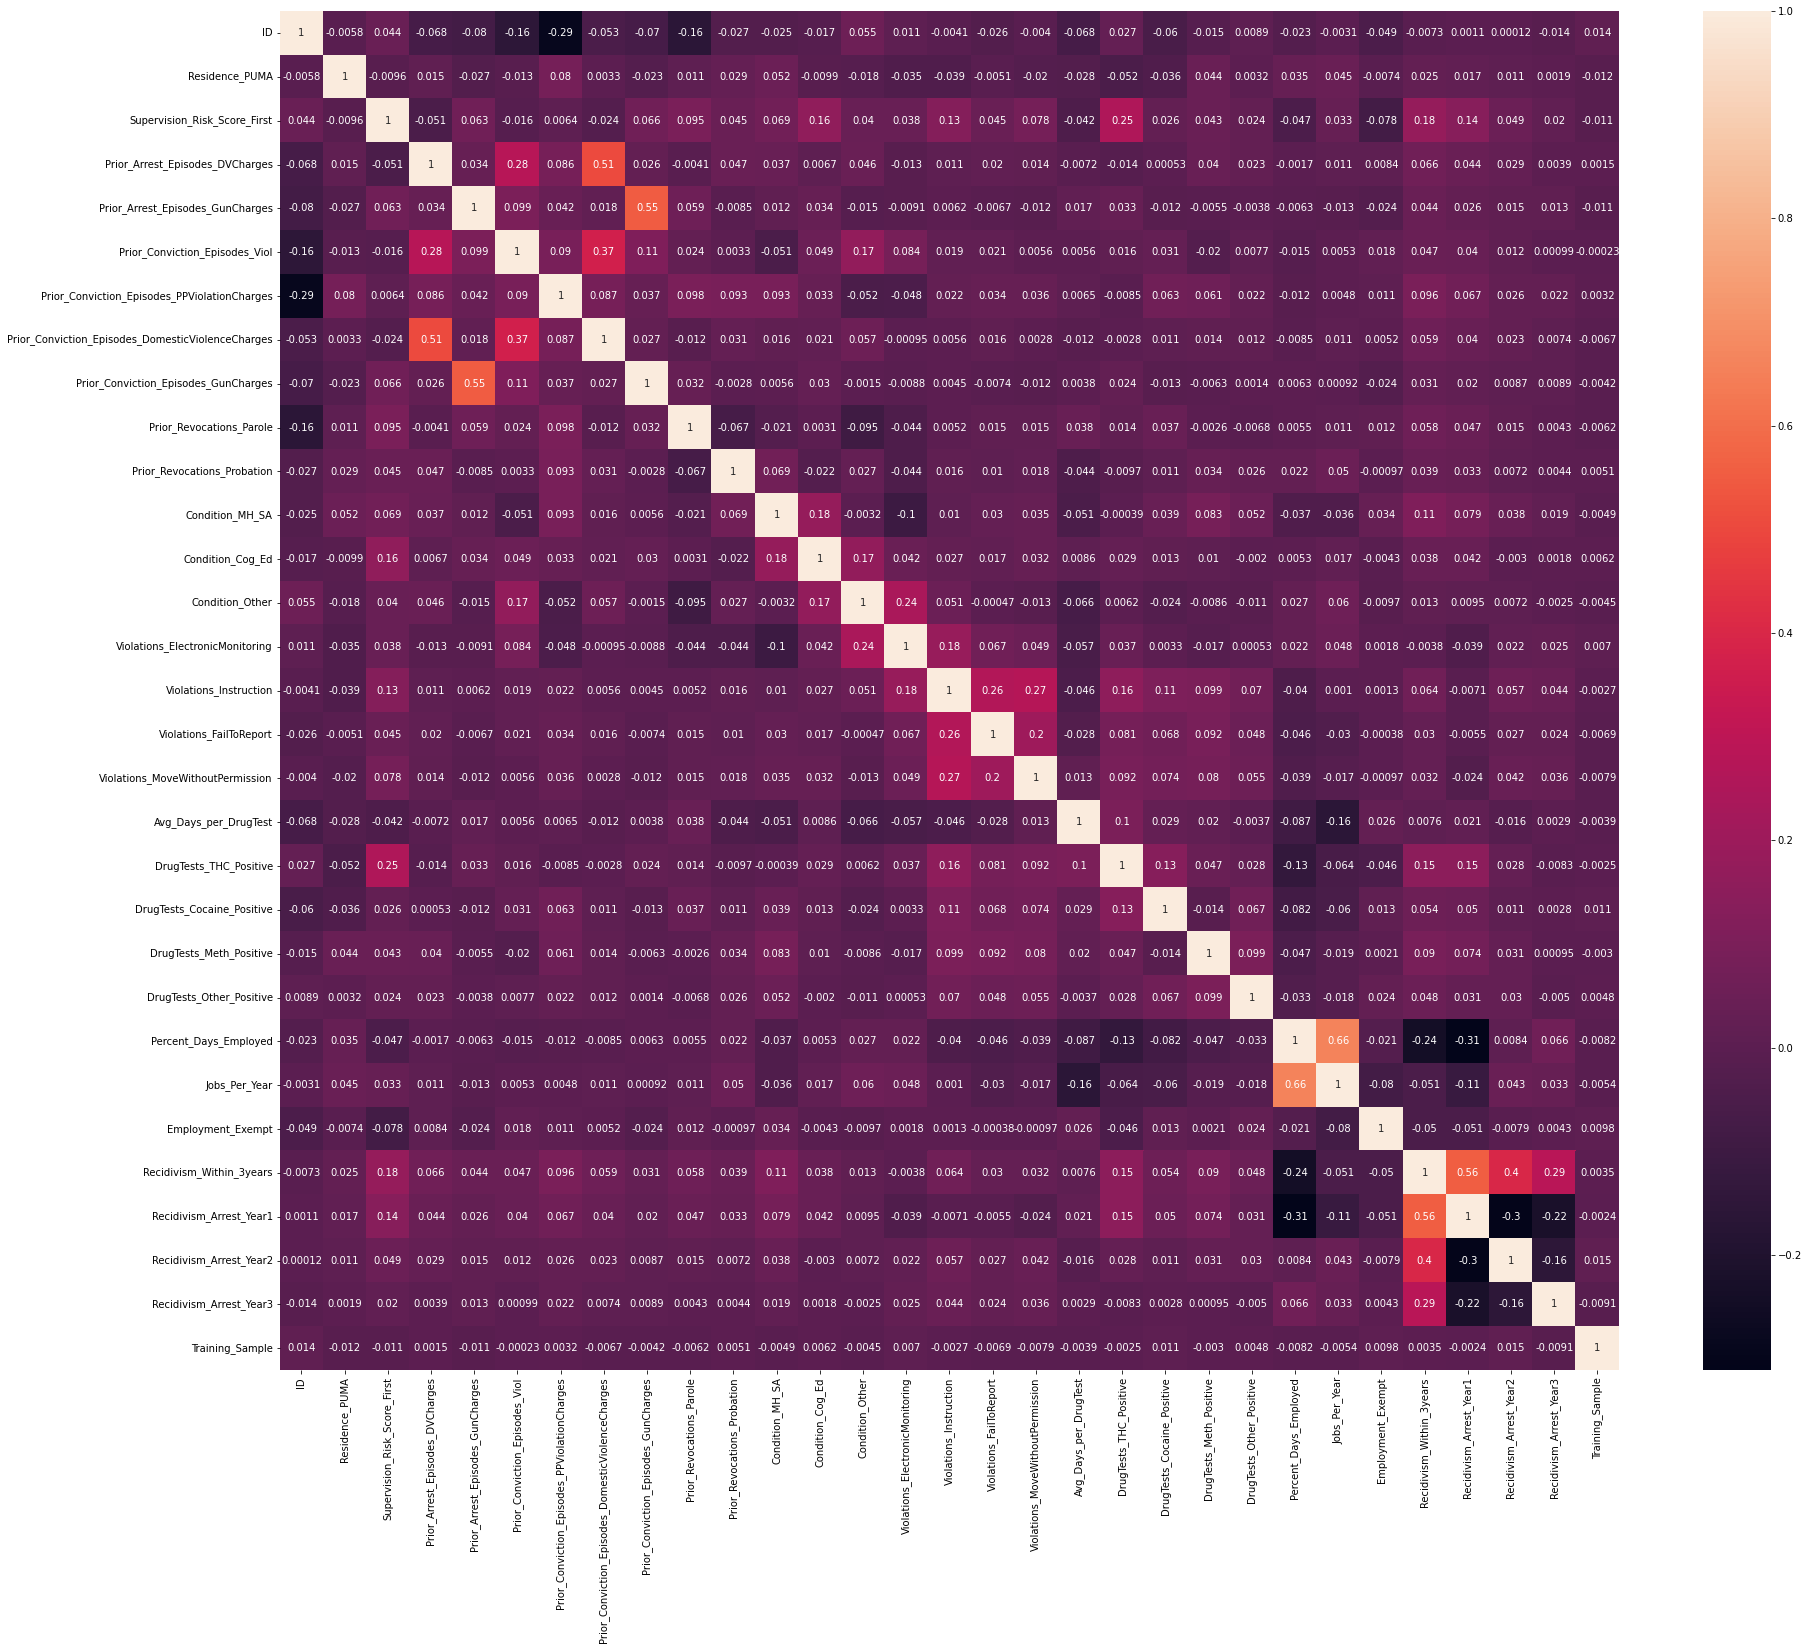

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# compute the correlation matrix
corr = df.corr()

fig, ax = plt.subplots(figsize=(30,25))
sns.heatmap(corr, annot=True,ax=ax)
plt.show()

#Bonus Question:

In [ ]:
numerical_columns = ['Residence_PUMA','Supervision_Risk_Score_First', 'Avg_Days_per_DrugTest', 'DrugTests_THC_Positive',
       'DrugTests_Cocaine_Positive', 'DrugTests_Meth_Positive',
       'DrugTests_Other_Positive', 'Percent_Days_Employed', 'Jobs_Per_Year', 'Training_Sample']

categorical_columns = ['Gender', 'Race', 'Age_at_Release', 'Gang_Affiliated', 
       'Supervision_Level_First', 'Education_Level', 'Dependents',
       'Prison_Offense', 'Prison_Years', 'Prior_Arrest_Episodes_Felony',
       'Prior_Arrest_Episodes_Misd', 'Prior_Arrest_Episodes_Violent',
       'Prior_Arrest_Episodes_Property', 'Prior_Arrest_Episodes_Drug',
       'Prior_Arrest_Episodes_PPViolationCharges',
       'Prior_Arrest_Episodes_DVCharges', 'Prior_Arrest_Episodes_GunCharges',
       'Prior_Conviction_Episodes_Felony', 'Prior_Conviction_Episodes_Misd',
       'Prior_Conviction_Episodes_Viol', 'Prior_Conviction_Episodes_Prop',
       'Prior_Conviction_Episodes_Drug',
       'Prior_Conviction_Episodes_PPViolationCharges',
       'Prior_Conviction_Episodes_DomesticViolenceCharges',
       'Prior_Conviction_Episodes_GunCharges', 'Prior_Revocations_Parole',
       'Prior_Revocations_Probation', 'Condition_MH_SA', 'Condition_Cog_Ed',
       'Condition_Other', 'Violations_ElectronicMonitoring',
       'Violations_Instruction', 'Violations_FailToReport',
       'Violations_MoveWithoutPermission', 'Delinquency_Reports',
       'Program_Attendances', 'Program_UnexcusedAbsences', 'Residence_Changes',
       'Employment_Exempt', 'Recidivism_Within_3years',
       'Recidivism_Arrest_Year1', 'Recidivism_Arrest_Year2']

In [ ]:
#Encode Categorical variable
# One-hot encode the variables
encoded_part_X = pd.get_dummies(df[df.columns[df.columns.isin(categorical_columns)]])
encoded_part_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Columns: 131 entries, Prior_Arrest_Episodes_DVCharges to Residence_Changes_3 or more
dtypes: bool(19), uint8(112)
memory usage: 3.2 MB


In [ ]:
Y= df['Recidivism_Arrest_Year3']

X = pd.concat([encoded_part_X, df[df.columns[df.columns.isin(numerical_columns)]]], axis=1)

X.shape, Y.shape, X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Columns: 141 entries, Prior_Arrest_Episodes_DVCharges to Training_Sample
dtypes: bool(19), float64(8), int64(2), uint8(112)
memory usage: 5.2 MB


((25835, 141), (25835,), None)

In [ ]:
#Handle NaN vlaues
print('before: ', X.isnull().sum())
X = X.fillna(df.mean())
print('After: ', X.isnull().sum())

before:  Prior_Arrest_Episodes_DVCharges                         0
Prior_Arrest_Episodes_GunCharges                        0
Prior_Conviction_Episodes_Viol                          0
Prior_Conviction_Episodes_PPViolationCharges            0
Prior_Conviction_Episodes_DomesticViolenceCharges       0
                                                     ... 
DrugTests_Meth_Positive                              5172
DrugTests_Other_Positive                             5172
Percent_Days_Employed                                 462
Jobs_Per_Year                                         808
Training_Sample                                         0
Length: 141, dtype: int64
After:  Prior_Arrest_Episodes_DVCharges                      0
Prior_Arrest_Episodes_GunCharges                     0
Prior_Conviction_Episodes_Viol                       0
Prior_Conviction_Episodes_PPViolationCharges         0
Prior_Conviction_Episodes_DomesticViolenceCharges    0
                                            

<ipython-input-26-010400a40154>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X = X.fillna(df.mean())


In [ ]:
#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(Y)
y_transformed

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler to the DataFrame
scaler.fit(X)

# Transform the DataFrame and store the result in a new variable
X_scaled = scaler.transform(X)

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_transformed, test_size=0.2, random_state=42)
# Create a linear regression model
model = SVC(C=1.0, kernel='linear', degree=3, gamma='auto', probability = True)

# Fit the model to the training data
result = model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


# Evaluate the model's performance
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')


accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Coefficients: [[-4.92027853e-06  4.54711828e-06 -8.44293804e-06  8.51331767e-06
   5.73273784e-06 -2.12292442e-05  1.12772507e-06 -6.86184691e-06
   7.33389606e-06  2.69815288e-06 -1.16497762e-05  1.82955873e-06
   1.70042109e-06 -2.84173947e-06 -6.56040375e-06 -2.02070648e-06
   9.87920440e-01 -9.15443220e-01 -7.62805483e-01  2.44914202e-07
  -2.44914201e-07 -3.91146048e-06  3.91146048e-06 -8.99860760e-07
   3.44498265e-07  5.80523968e-07 -2.86573535e-06  7.99850305e-06
   6.90556175e-08 -4.66492377e-06 -1.99741880e-06  2.25789316e-06
  -6.21882812e-06 -4.18159881e-06 -1.29190143e-05 -7.90648548e-06
   5.42100322e-06  6.88808289e-07 -9.59861734e-06 -1.74818228e-06
   4.94586933e-07  1.08174965e-05  2.55203573e-06  5.94211117e-07
   1.04966882e-05 -9.03304166e-07 -8.75364221e-06  9.53344296e-07
   3.77806233e-07  4.81424470e-06 -6.86899263e-06 -1.24332790e-17
   1.26613990e-05  2.26834423e-06 -4.91125343e-06 -5.11391119e-06
  -7.48495770e-07  1.85114691e-06 -8.79988644e-07 -2.51126340e